<a href="https://colab.research.google.com/github/mezgoodle/ad_labs/blob/master/docs/lab5/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вступ

Створити програму, яка виконує наступні завдання:

1. Створити не менше двох об’єктів TimeSeries, у яких індекси створені за
допомогою date_range(). Виділити підмасиви у цих об’єктів. Провести
об’єднання об’єктів TimeSeries за допомогою merge_asof().

2. Виконати завдання відповідно до варіанту.

Варіант 7.
*Файл Microsoft_Stock.csv.*

1. Побудувати графік зміни ціни на час закриття біржі: а) загальний; б)
за 2019 рік; в) за вересень 2018 року; г) за листопад 2015 – січень
2018; д) за останні два тижня січня 2021-го року.

2. Знайти середні значення найбільшої ціни за день а) за 2016 рік; б) за
кожний місяць; в) за кожний тиждень першого кварталу 2019 року.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Дані

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/mezgoodle/ad_labs/master/data/Microsoft_Stock.csv', index_col='Date', parse_dates=True)
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1511 entries, 2015-04-01 16:00:00 to 2021-03-31 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 70.8 KB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1511.0,1.073860e+02,5.669133e+01,40.34,5.786000e+01,93.99,1.394400e+02,2.450300e+02
High,1511.0,1.084375e+02,5.738228e+01,40.74,5.806000e+01,95.10,1.403250e+02,2.461300e+02
Low,1511.0,1.062945e+02,5.597716e+01,39.72,5.742000e+01,92.92,1.378250e+02,2.429200e+02
Close,1511.0,1.074221e+02,5.670230e+01,40.29,5.785500e+01,93.86,1.389650e+02,2.449900e+02
Volume,1511.0,3.019863e+07,1.425266e+07,101612.00,2.136213e+07,26629615.00,3.431962e+07,1.352271e+08


# Перше завдання

In [69]:
date_indexes = pd.date_range('2015-04-01 16:00:00', '2021', freq='3D')
date_indexes

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-04 16:00:00',
               '2015-04-07 16:00:00', '2015-04-10 16:00:00',
               '2015-04-13 16:00:00', '2015-04-16 16:00:00',
               '2015-04-19 16:00:00', '2015-04-22 16:00:00',
               '2015-04-25 16:00:00', '2015-04-28 16:00:00',
               ...
               '2020-12-03 16:00:00', '2020-12-06 16:00:00',
               '2020-12-09 16:00:00', '2020-12-12 16:00:00',
               '2020-12-15 16:00:00', '2020-12-18 16:00:00',
               '2020-12-21 16:00:00', '2020-12-24 16:00:00',
               '2020-12-27 16:00:00', '2020-12-30 16:00:00'],
              dtype='datetime64[ns]', length=701, freq='3D')

In [70]:
open_series = pd.Series(df['Open'], index=date_indexes).fillna(method='ffill')
open_series

2015-04-01 16:00:00     40.60
2015-04-04 16:00:00     40.60
2015-04-07 16:00:00     41.61
2015-04-10 16:00:00     41.63
2015-04-13 16:00:00     41.40
                        ...  
2020-12-18 16:00:00    218.59
2020-12-21 16:00:00    217.55
2020-12-24 16:00:00    217.55
2020-12-27 16:00:00    217.55
2020-12-30 16:00:00    225.23
Freq: 3D, Name: Open, Length: 701, dtype: float64

In [71]:
date_indexes = pd.date_range('2015-04-01 16:00:00', '2019-11', freq='3B')
date_indexes

DatetimeIndex(['2015-04-01 16:00:00', '2015-04-06 16:00:00',
               '2015-04-09 16:00:00', '2015-04-14 16:00:00',
               '2015-04-17 16:00:00', '2015-04-22 16:00:00',
               '2015-04-27 16:00:00', '2015-04-30 16:00:00',
               '2015-05-05 16:00:00', '2015-05-08 16:00:00',
               ...
               '2019-09-20 16:00:00', '2019-09-25 16:00:00',
               '2019-09-30 16:00:00', '2019-10-03 16:00:00',
               '2019-10-08 16:00:00', '2019-10-11 16:00:00',
               '2019-10-16 16:00:00', '2019-10-21 16:00:00',
               '2019-10-24 16:00:00', '2019-10-29 16:00:00'],
              dtype='datetime64[ns]', length=399, freq='3B')

In [72]:
close_series = pd.Series(df['Close'], index=date_indexes).fillna(method='ffill')
close_series

2015-04-01 16:00:00     40.72
2015-04-06 16:00:00     41.55
2015-04-09 16:00:00     41.48
2015-04-14 16:00:00     41.65
2015-04-17 16:00:00     41.62
                        ...  
2019-10-11 16:00:00    139.68
2019-10-16 16:00:00    140.41
2019-10-21 16:00:00    138.43
2019-10-24 16:00:00    139.94
2019-10-29 16:00:00    142.83
Freq: 3B, Name: Close, Length: 399, dtype: float64

In [73]:
open_series_indexed = open_series['2016-05':'2017-03']
open_series_indexed

2016-05-01 16:00:00    50.62
2016-05-04 16:00:00    49.84
2016-05-07 16:00:00    49.84
2016-05-10 16:00:00    50.33
2016-05-13 16:00:00    51.44
                       ...  
2017-03-18 16:00:00    64.55
2017-03-21 16:00:00    65.19
2017-03-24 16:00:00    65.12
2017-03-27 16:00:00    64.63
2017-03-30 16:00:00    65.42
Freq: 3D, Name: Open, Length: 112, dtype: float64

In [74]:
close_series_indexed = close_series['2017-05']
close_series_indexed

2017-05-01 16:00:00    69.41
2017-05-04 16:00:00    68.81
2017-05-09 16:00:00    69.04
2017-05-12 16:00:00    68.38
2017-05-17 16:00:00    67.48
2017-05-22 16:00:00    68.45
2017-05-25 16:00:00    69.62
2017-05-30 16:00:00    70.41
Freq: 3B, Name: Close, dtype: float64

In [75]:
merged_series = pd.merge_asof(open_series, close_series, left_index=True, right_index=True)
merged_series

,Open,Close
2015-04-01 16:00:00,40.60,40.72
2015-04-04 16:00:00,40.60,40.72
2015-04-07 16:00:00,41.61,41.55
2015-04-10 16:00:00,41.63,41.48
2015-04-13 16:00:00,41.40,41.48
...,...,...
2020-12-18 16:00:00,218.59,142.83
2020-12-21 16:00:00,217.55,142.83
2020-12-24 16:00:00,217.55,142.83
2020-12-27 16:00:00,217.55,142.83


# Друге завдання


In [76]:
close_series = pd.Series(df['Close'])

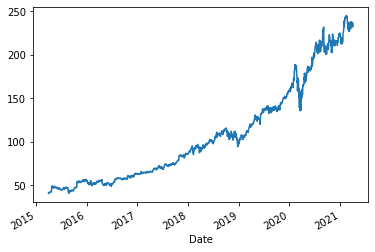

In [77]:
close_series.plot()

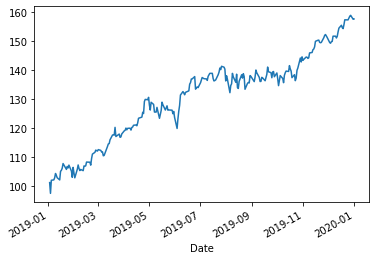

In [78]:
close_series['2019'].plot()

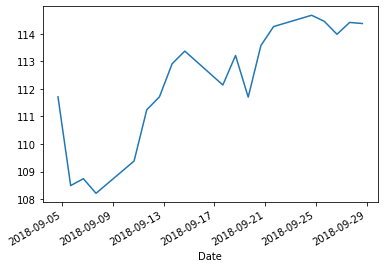

In [79]:
close_series['2018-09'].plot()

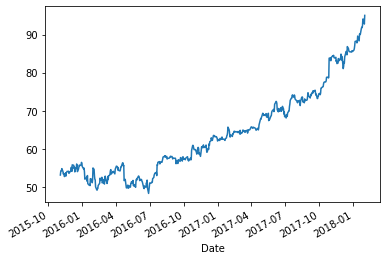

In [80]:
close_series['2015-11': '2018-01'].plot()

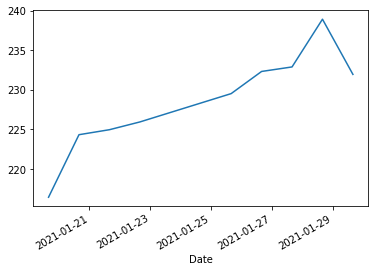

In [81]:
close_series['2021-01'].last('2W').plot()

# Третє завдання

In [82]:
high_series = pd.Series(df['High'])
high_series

Date
2015-04-01 16:00:00     40.76
2015-04-02 16:00:00     40.74
2015-04-06 16:00:00     41.78
2015-04-07 16:00:00     41.91
2015-04-08 16:00:00     41.69
                        ...  
2021-03-25 16:00:00    236.94
2021-03-26 16:00:00    236.71
2021-03-29 16:00:00    236.80
2021-03-30 16:00:00    233.85
2021-03-31 16:00:00    239.10
Name: High, Length: 1511, dtype: float64

In [83]:
high_series['2016'].mean()

55.677460317460344

In [84]:
high_series.to_period('M').groupby(level=0).mean()

Date
2015-04     43.736667
2015-05     47.977000
2015-06     46.466364
2015-07     46.013182
2015-08     46.120476
              ...    
2020-11    216.458000
2020-12    219.528636
2021-01    224.572105
2021-02    241.967368
2021-03    236.289565
Freq: M, Name: High, Length: 72, dtype: float64

In [87]:
high_series['2019'].first('3M').to_period('W').groupby(level=0).mean()

Date
2018-12-31/2019-01-06    101.483333
2019-01-07/2019-01-13    103.862000
2019-01-14/2019-01-20    105.742000
2019-01-21/2019-01-27    107.255000
2019-01-28/2019-02-03    105.430000
2019-02-04/2019-02-10    106.288000
2019-02-11/2019-02-17    107.418000
2019-02-18/2019-02-24    109.320000
2019-02-25/2019-03-03    112.736000
2019-03-04/2019-03-10    112.112000
2019-03-11/2019-03-17    114.878000
2019-03-18/2019-03-24    119.042000
2019-03-25/2019-03-31    118.166000
Freq: W-SUN, Name: High, dtype: float64